In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

%matplotlib inline


## import training data

In [2]:
train_data = pd.read_csv(r'C:\Users\Jay\Documents\important misc\EIT\MNIST_Classifer\mnist_training.csv',header=None)
X= train_data.values

C:\Users\Jay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

# check shape of data

In [3]:
train_data.shape

(60001, 785)

In [4]:
type(train_data)


pandas.core.frame.DataFrame

In [5]:



y = X[1:,0] 
X = X[1:,1:]
X.shape
X = X.astype(int)
#print(X)
print(X.shape)
 

(60000, 784)


# normalize data

In [6]:
X = X /255
print(X)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
y.shape

#print(y)

(60000,)

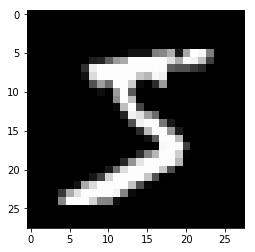

In [8]:
plt.imshow(X[0].reshape((28,28)), cmap='gray')
plt.show()

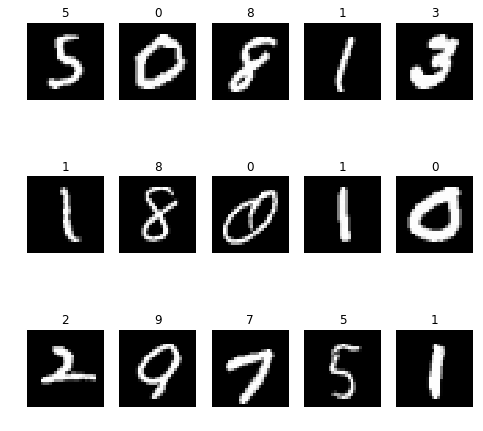

In [9]:
def plot_images(images, labels):
    n_cols=min(5, len(images))
    n_rows=len(images) //n_cols
    fig=plt.figure(figsize= (8, 8))
    for i in range(n_rows*n_cols):
        sp=fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis('off')
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()
p = np.random.permutation(len(X))
p = p[:15]
plot_images(X[p].reshape(-1, 28, 28), y[p])

In [10]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [11]:
class GaussBayes(): 
    def fit(self, X, y, epsilon = 10e-3):
        self.likihoods = dict() 
        self.priors = dict() 
        self.K = set(y.astype(int)) 
        for k in self.K:
            X_k = X[y==k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis = 0)
            self.likihoods[k] = {"mean" : X_k.mean(axis=0),
                                 "cov": (1/(N_k - 1))*np.matmul((X_k - mu_k).T, X_k - mu_k) + epsilon*np.identity(D) }
            self.priors[k] = len(X_k)/len(X)
    def predict(self, X):
        N,D = X.shape #
        P_hat = np.zeros((N,len(self.K))) # this is a tuple
        for k, l in self.likihoods.items():
            P_hat[:,k] = mvn.logpdf(X,l["mean"],
                                    l["cov"]) + np.log(self.priors[k]) 

        return P_hat.argmax(axis=1) 

# Import Testing Data

In [12]:
testing_data = pd.read_csv(r'C:\Users\Jay\Documents\important misc\EIT\MNIST_Classifer\mnist_testing.csv',header=None)

C:\Users\Jay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [13]:
testing_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
testing_data.shape

(10001, 785)

In [15]:
X_test = testing_data.values 
y_test = X_test[1:,0] 
X_test = X_test[1:,:-1] 
X_test.shape
print(X_test.shape)


(10000, 784)


In [16]:
y_test.shape


(10000,)

In [17]:
y_test = y_test.astype('int32')
X_test = X_test.astype('int32')
X_test = X_test / 255.0
X_test.min(), X_test.max()

(0.0, 1.0)

In [18]:
gnb = GaussBayes()
gnb.fit(X,y,epsilon=10e-3)

In [19]:

y_hat = gnb.predict(X_test)

print(y_hat)

[7 2 1 ... 4 5 6]


In [20]:
print(f"Accuracy: {accuracy(y_test, y_hat):0.3f}")

Accuracy: 0.927


In [21]:
def show_me(X):
    plt.imshow(X.reshape(28,28))
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))
def allmean(X,y,k):
    returnsum(X[y==k,:]/len(X[y==k,:]))

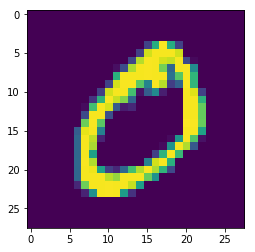

In [22]:
show_me(X[1])


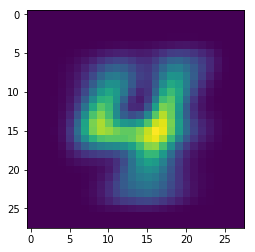

In [23]:
show_me_allmean(X,y,4)


Text(0.5,87,'predicted')

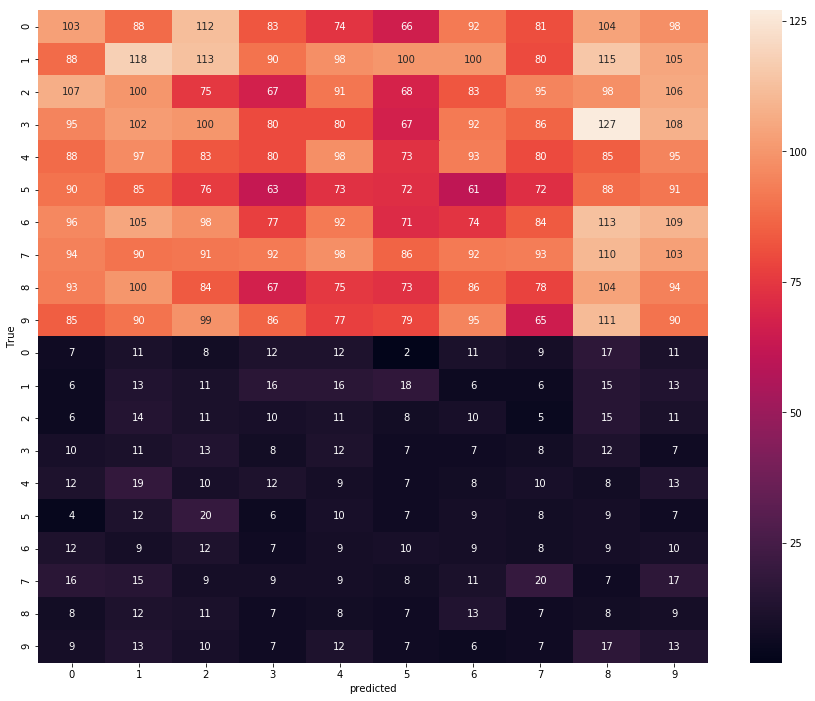

In [24]:
plt.figure(figsize=(15,12))
y_act = pd.Series(y,name='actual')
y_pred = pd.Series(y_hat,name='predicted')
cm = pd.crosstab(y_act,y_pred)
ax = sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel('True')
plt.xlabel('predicted')

# Visual assistance use case

In [25]:
fashion_data = pd.read_csv(r'C:\Users\Jay\Documents\important misc\EIT\MNIST_Classifer\fashion\fashion_mnist_training.csv',header=None)


C:\Users\Jay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [26]:
X2= fashion_data.values

In [27]:
type(fashion_data)


pandas.core.frame.DataFrame

In [28]:
fashion_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
4,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [29]:
y2 = X2[1:,0] 
X2 = X2[1:,1:]
X2.shape
X2 = X2.astype(int)

print(X2.shape)

(60000, 784)


In [74]:
X2 = X2 /255
print(X2)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [70]:
y2.shape

#print(y)

(60000,)

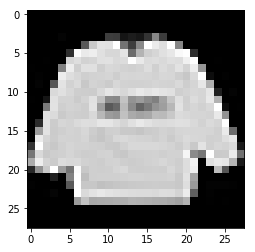

In [33]:
plt.imshow(X2[0].reshape((28,28)), cmap='gray')
plt.show()

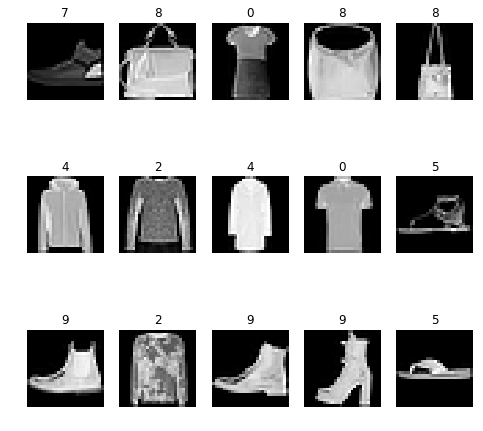

In [34]:
p2 = np.random.permutation(len(X2))
p2 = p[:15]
plot_images(X2[p2].reshape(-1, 28, 28), y2[p2])

In [36]:
fashion_testing_data = pd.read_csv(r'C:\Users\Jay\Documents\important misc\EIT\MNIST_Classifer\fashion\fashion_mnist_testing.csv',header=None)

C:\Users\Jay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [37]:
fashion_testing_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0


In [38]:
fashion_testing_data.shape

(10001, 785)

In [39]:
X_test2 = fashion_testing_data.values 
y_test2 = X_test2[1:,0] 
X_test2 = X_test2[1:,:-1] 
X_test2.shape
print(X_test2.shape)

(10000, 784)


In [40]:
y_test.shape


(10000,)

In [41]:
y_test2 = y_test2.astype('int32')
X_test2 = X_test2.astype('int32')
X_test2 = X_test2 / 255.0
X_test2.min(), X_test2.max()

(0.0, 1.0)

In [66]:
gnb2 = GaussBayes()
gnb2.fit(X2,y2,epsilon=10e-3)

In [72]:
y_hat2 = gnb2.predict(X_test2)

print(y_hat2)

[0 1 2 ... 8 8 6]


In [73]:
print(f"Accuracy: {accuracy(y_test2, y_hat2):0.3f}")

Accuracy: 0.740


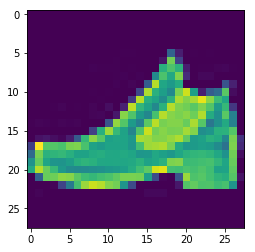

In [53]:
           
show_me(X2[1])

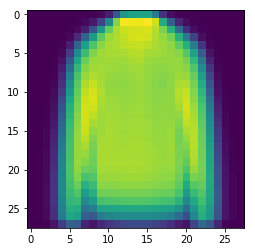

In [46]:
show_me_allmean(X2,y2,4)


Text(0.5,87,'predicted')

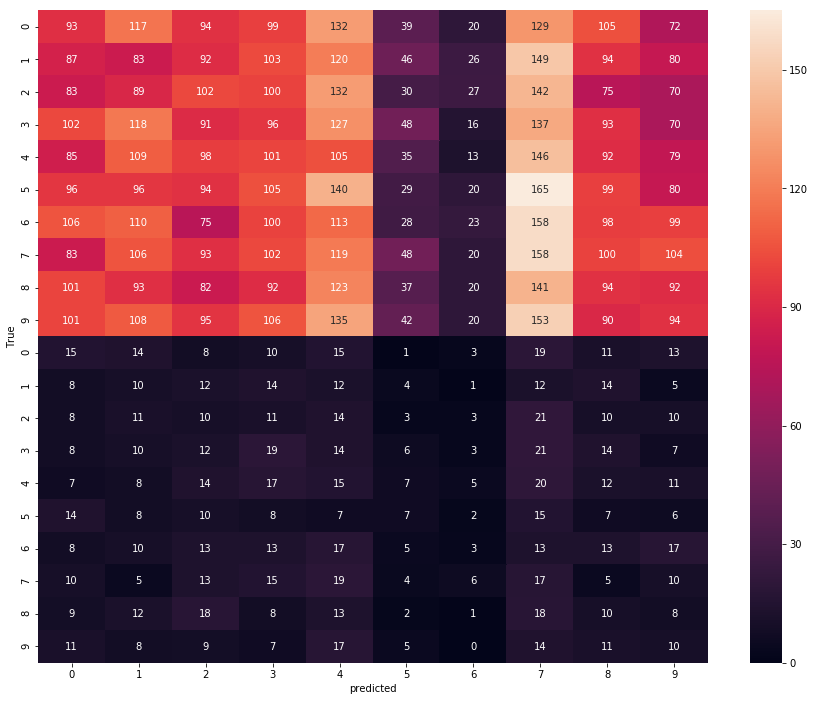

In [47]:
plt.figure(figsize=(15,12))
y_act2 = pd.Series(y2,name='actual')
y_pred2 = pd.Series(y_hat2,name='predicted')
cm2 = pd.crosstab(y_act2,y_pred2)
ax2 = sns.heatmap(cm2,annot=True,fmt='d')
plt.ylabel('True')
plt.xlabel('predicted')